In [ ]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
class dataproc:
  """A simple class for ranking detectors by speed and occupancy"""
  def __init__(self,path):
    self.path = path
    self.n = 1
    self.days = [2,3]

  def read_csv_format(self):
    df = pd.read_csv(self.path)
    df['datetime'] = pd.to_datetime(df['datetime'])

    return df

  def pick_random(self):
    # df is dataframe
    # n is the number of detectors to filter
    df = self.read_csv_format()
    unique_detectors = df['detector_id'].unique()
    select_detectors = random.sample(unique_detectors.tolist(),self.n)
    df_filter = df[df['detector_id'].isin(select_detectors)]
    return df_filter


  def visualize(self, df):
    return df['occupancy'].plot.hist(), df.plot(x='datetime',y='occupancy')

  def split_data(self,df):
    df['day'] = df['datetime'].dt.day
    df['hour']= df['datetime'].dt.hour
    df = df[(df['hour']>=6) & (df['hour']<=20) ]
    return df[df['day']==self.days[0]],df[df['day']==self.days[1]]

In [ ]:
path = '/content/gdrive/MyDrive/CV_ENG_8160/Module02/DATA/Copy of delay_bottleneck.csv'
dp = dataproc(path)

In [ ]:
df = dp.read_csv_format()

In [ ]:
df.head()

,detector_id,travelway,direction,loc,datetime,speed,volume,occupancy,congested,long,lat
0,MI064E009.1D,64,East,9.1,2017-09-01 02:09:00,62.000000,1.000000,1.000000,0.0,-90.7043,38.7141
1,MI064E009.1D,64,East,9.6,2017-09-01 02:09:00,61.285714,1.476190,1.238095,0.0,-90.7043,38.7141
2,MI064E009.1D,64,East,10.1,2017-09-01 02:09:00,61.214286,1.523810,1.261905,0.0,-90.7043,38.7141
3,MI064E009.1D,64,East,9.1,2017-09-01 02:44:00,59.250000,1.250000,1.000000,0.0,-90.7043,38.7141
4,MI064E009.1D,64,East,9.6,2017-09-01 02:44:00,63.833333,1.071429,1.000000,0.0,-90.7043,38.7141


In [ ]:
df_grp = df.groupby('detector_id').size().reset_index(name='cnt')
df_grp['idx'] = df_grp.reset_index
print(df_grp.to_dict()['detector_id'])

{0: 'MI064E009.1D', 1: 'MI064E009.8D', 2: 'MI064E011.2D', 3: 'MI064E012.8D', 4: 'MI064E013.6D', 5: 'MI064E015.2D', 6: 'MI064E016.3D', 7: 'MI064E017.0D', 8: 'MI064E018.1D', 9: 'MI064E018.9D', 10: 'MI064E021.9D', 11: 'MI064E023.2D', 12: 'MI064E024.2D', 13: 'MI064W009.2D', 14: 'MI064W010.0D', 15: 'MI064W011.1D', 16: 'MI064W012.8D', 17: 'MI064W013.6D', 18: 'MI064W015.1D', 19: 'MI064W015.9D', 20: 'MI064W017.0D', 21: 'MI064W017.9D', 22: 'MI064W018.4D', 23: 'MI064W018.9D', 24: 'MI064W020.2D', 25: 'MI064W021.9D', 26: 'MI070E204.0D', 27: 'MI070E204.9D', 28: 'MI070E206.0D', 29: 'MI070E208.5D', 30: 'MI070E209.6D', 31: 'MI070E210.0D', 32: 'MI070E212.2D', 33: 'MI070E212.9D', 34: 'MI070E214.2D', 35: 'MI070E215.2D', 36: 'MI070E216.3D', 37: 'MI070E217.1D', 38: 'MI070E218.2D', 39: 'MI070E219.1D', 40: 'MI070E220.5D', 41: 'MI070E221.4D', 42: 'MI070E222.2D', 43: 'MI070E222.6D', 44: 'MI070E223.9D', 45: 'MI070E225.4D', 46: 'MI070E226.1D', 47: 'MI070E227.2D', 48: 'MI070E228.6D', 49: 'MI070E229.6D', 50: 'MI07

In [ ]:
df_grp = df.groupby('detector_id').size().reset_index(name='cnt')
df_grp['idx'] = df_grp.reset_index
df['detector_id_type'] = df['detector_id'].map(df_grp.set_index('detector_id')['cnt'].to_dict())

In [ ]:
df.head()

,detector_id,travelway,direction,loc,datetime,speed,volume,occupancy,congested,long,lat,detector_id_type
0,MI064E009.1D,64,East,9.1,2017-09-01 02:09:00,62.000000,1.000000,1.000000,0.0,-90.7043,38.7141,5351
1,MI064E009.1D,64,East,9.6,2017-09-01 02:09:00,61.285714,1.476190,1.238095,0.0,-90.7043,38.7141,5351
2,MI064E009.1D,64,East,10.1,2017-09-01 02:09:00,61.214286,1.523810,1.261905,0.0,-90.7043,38.7141,5351
3,MI064E009.1D,64,East,9.1,2017-09-01 02:44:00,59.250000,1.250000,1.000000,0.0,-90.7043,38.7141,5351
4,MI064E009.1D,64,East,9.6,2017-09-01 02:44:00,63.833333,1.071429,1.000000,0.0,-90.7043,38.7141,5351


(<Axes: ylabel='Frequency'>, <Axes: xlabel='datetime'>)

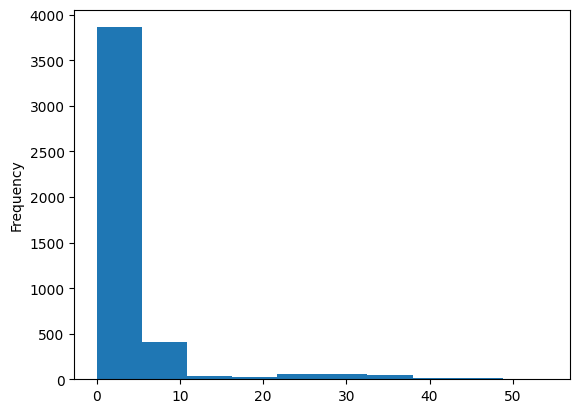

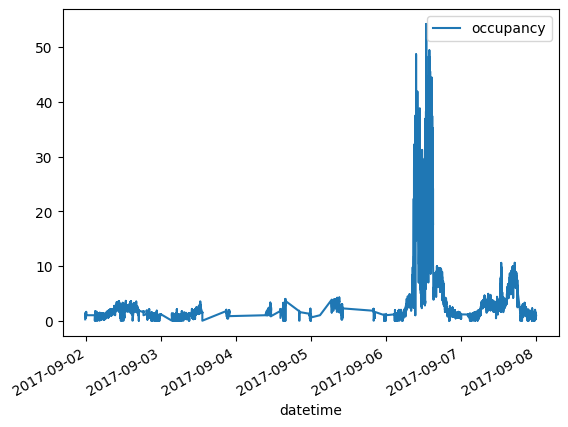

In [ ]:
dp.visualize(df)

## Stationarity

In [ ]:
[df1,df2] = dp.split_data(df)

In [ ]:
df1.head()

,detector_id,travelway,direction,loc,datetime,speed,volume,occupancy,congested,long,lat,day,hour
716757,MI270N022.3D,270,North,21.6,2017-09-02 06:09:00,58.200000,1.348148,1.088889,0.0,-90.406403,38.769699,2,6
716758,MI270N022.3D,270,North,22.1,2017-09-02 06:09:00,51.200000,1.385185,1.311111,0.0,-90.406403,38.769699,2,6
716759,MI270N022.3D,270,North,22.6,2017-09-02 06:09:00,48.400000,1.400000,1.400000,0.0,-90.406403,38.769699,2,6
716760,MI270N022.3D,270,North,21.6,2017-09-02 06:44:00,64.055556,1.231481,1.000000,0.0,-90.406403,38.769699,2,6
716761,MI270N022.3D,270,North,22.1,2017-09-02 06:44:00,60.444444,1.185185,1.000000,0.0,-90.406403,38.769699,2,6


In [ ]:
df2.head()

,detector_id,travelway,direction,loc,datetime,speed,volume,occupancy,congested,long,lat,day,hour
717584,MI270N022.3D,270,North,21.6,2017-09-03 06:09:00,59.259259,1.0,1.111111,0.0,-90.406403,38.769699,3,6
717585,MI270N022.3D,270,North,22.1,2017-09-03 06:09:00,54.074074,1.0,1.388889,0.0,-90.406403,38.769699,3,6
717586,MI270N022.3D,270,North,22.6,2017-09-03 06:09:00,52.000000,1.0,1.500000,0.0,-90.406403,38.769699,3,6
717587,MI270N022.3D,270,North,21.6,2017-09-03 06:44:00,60.111111,1.0,1.000000,0.0,-90.406403,38.769699,3,6
717588,MI270N022.3D,270,North,22.1,2017-09-03 06:44:00,52.888889,1.0,1.000000,0.0,-90.406403,38.769699,3,6


<Axes: ylabel='Frequency'>

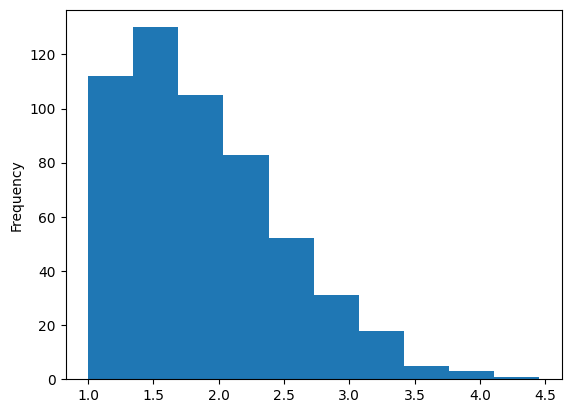

In [ ]:
df1['occupancy'].plot.hist()

<Axes: ylabel='Frequency'>

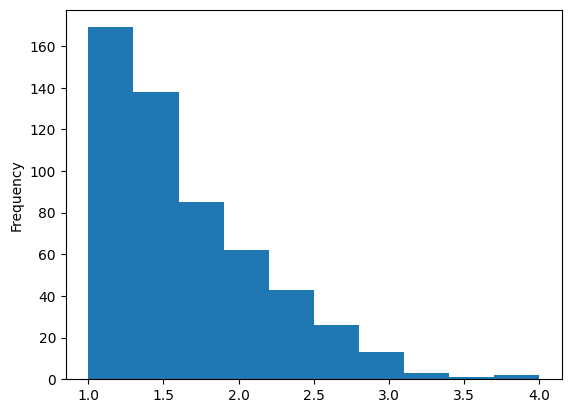

In [ ]:
df2['occupancy'].plot.hist()

In [ ]:
print ('means of both datasets')
print (df1['occupancy'].mean(),df2['occupancy'].mean())
print ('\nvariance between both datasets')
print (df1['occupancy'].var(),df2['occupancy'].var())

means of both datasets
1.88271216437882 1.6332908512597186

variance between both datasets
0.3802375444906883 0.2855147371036645


# Use Dicker fuller test to test for significance

In [ ]:

def cor_coeff(df1, df2,column):
  mu1,std1 = df1[column].values.mean(), df1[column].values.std()
  mu2, std2 = df2[column].values.mean(), df2[column].values.std()

  xcor,ycor = (df1[column]-mu1).values, (df2[column]-mu2).values
  if not (len(xcor) == len(ycor)):
    xcor = np.resize(xcor,ycor.shape)

  x_comp = np.divide(xcor,std1)
  y_comp = np.divide(ycor,std2)

  numerator = np.sum(np.multiply(xcor,ycor))
  denominator = np.sqrt((np.sum(xcor**2)*np.sum(ycor**2)))
  coeff = numerator/denominator

  return coeff

In [ ]:
coeff = cor_coeff(df1, df2, 'volume')
print (coeff)

0.6003485141619683


In [ ]:
def cor_coeff_array(x, y):
  mu1,std1 = np.mean(x), np.std(x)
  mu2, std2 = np.mean(y), np.std(y)

  xcor,ycor = x-mu1, y-mu2
  if not (len(xcor) == len(ycor)):
    xcor = np.resize(xcor,ycor.shape)

  x_comp = np.divide(xcor,std1)
  y_comp = np.divide(ycor,std2)

  numerator = np.sum(np.multiply(xcor,ycor))
  denominator = np.sqrt((np.sum(xcor**2)*np.sum(ycor**2)))
  coeff = numerator/denominator

  return coeff

In [ ]:
x_data = volume[0:105]
y_data = volume[5:107]
print (cor_coeff_array(x_data, y_data))

0.03771906855438786


In [ ]:
window = 2
lag = 1
data_len = 300; # check 50 through 500
volume = df1['volume'].values; # check for occupancy and speed
corrs = []
for data_range in range(0,len(volume)-(data_len+lag),window):
  x_data = volume[0:data_range+data_len]
  y_data = volume[data_range+lag:data_range+data_len+lag]
  corrs.append(cor_coeff_array(x_data, y_data))

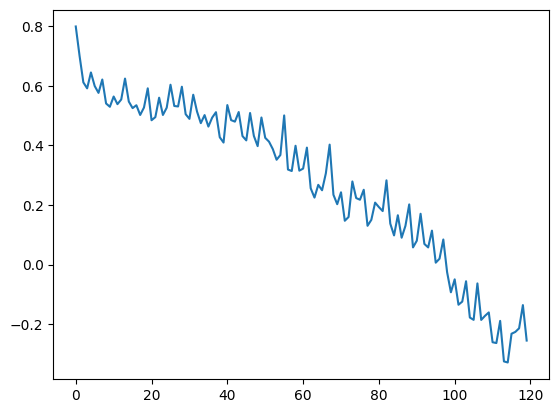

In [ ]:
plt.plot(corrs)

In [ ]:
print (cor)

NameError: name 'cor' is not defined